# Project 3: Statistical Data Analysis on Calling Plans
#### This project will be working with customer information who are subscribed to a phone company called Megaline. Megaline offers two plans: Surf and Ultimate which differ in cost, minutes allowed, texts allowed, and how much extra it costs to exceed those limits. The main goal is to determine which plan brings in more revenue. The four main steps include fixing/enriching each dataset, aggregate data per user for analysis, study user behavior, and perform statistical analysis testing to determine which plan is better for the company.

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

Importing essential libraries

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import math as mt
import datetime
import seaborn as sns

## Load data

Load the data into appropriately named dataframes

In [2]:
# Load the data files into different DataFrames
calls_df = pd.read_csv('/datasets/megaline_calls.csv')
internet_df = pd.read_csv('/datasets/megaline_internet.csv')
messages_df = pd.read_csv('/datasets/megaline_messages.csv')
plans_df = pd.read_csv('/datasets/megaline_plans.csv')
users_df = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

This next section will take a look at the general information of each dataframe, print a sample, and make corrections ie fixing data types, remove/fill missing values, and adding additional columns that might be useful.

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
plans_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans
plans_df.sample(2,random_state=1234)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Upon inspecting the plans_df, it has all the correct information and datatypes and each column name is descriptive.

## Fix data

There are no obvious issues with the data

## Enrich data

There is no additions I believe I need to make to the dataframe at this time.

## Users

In [5]:
# Print the general/summary information about the users' DataFrame
users_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Print a sample of data for users
users_df.sample(5,random_state=1234)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24
416,1416,Deja,Moss,25,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-10-03,surf,2018-11-21
350,1350,Al,Rasmussen,29,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-03-09,surf,NaN
358,1358,Vaughn,Maldonado,20,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-26,surf,2018-10-22
112,1112,Amal,Pacheco,18,"Grand Rapids-Kentwood, MI MSA",2018-10-08,ultimate,NaN


Upon inspecting the data, I notice that each column name is appropriate and the information generally looks satisfactory. The reg_data and churn_date columns need to be changed to date time datatypes. The churn_date also has many NaN values.

### Fix Data

In [7]:
users_df['user_id'].duplicated().value_counts() # checking for duplicate rows, found none
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], errors = 'coerce', format= "%Y-%m-%d") #changed column from strings to datetime
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], errors = 'coerce', format= "%Y-%m-%d")#changed column from string to datatime

#filling NaN values with '2019-01-01' since it is best not to have missing values and only dates from 2018 will be used
#I chose that date since only the year 2018 is being used and 2019-01-01 is the latest churn_date for any user
#end = pd.to_datetime('2019-01-01')
#users_df['churn_date'] = users_df['churn_date'].fillna(end)
users_df.sample(5,random_state=3422)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
180,1180,Wonda,Hays,24,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-01,surf,2018-12-22
215,1215,Adelle,Knapp,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-01,surf,NaT
409,1409,Elvis,Vargas,38,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-10-04,ultimate,NaT
236,1236,Odell,Juarez,74,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-04-04,ultimate,NaT
278,1278,Masako,Montgomery,39,"Dayton-Kettering, OH MSA",2018-11-03,surf,NaT


### Enrich Data

I added a num_days_active column in case an analyis on how long users will use a service was needed.

In [8]:
users_df['num_days_active'] = (users_df['churn_date'] - users_df['reg_date']).dt.days
users_df

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,num_days_active
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,NaN
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,NaN


## Calls

In [9]:
# Print the general/summary information about the calls' DataFrame
calls_df.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Print a sample of data for calls
calls_df.sample(10,random_state=5265)


,id,user_id,call_date,duration
71961,1255_1044,1255,2018-10-07,10.02
71661,1255_277,1255,2018-11-21,12.41
100381,1359_256,1359,2018-08-24,1.58
94201,1336_35,1336,2018-06-08,0.46
65479,1237_86,1237,2018-11-13,13.42
69944,1250_174,1250,2018-11-27,2.60
86539,1320_208,1320,2018-12-14,1.19
21951,1081_157,1081,2018-06-20,20.97
135690,1492_16,1492,2018-10-09,9.03
42930,1156_535,1156,2018-05-27,10.97


In this dataframe, the id column is a string format rather than an integer however the user_id column is an integer and each call can be linked to a unique user_id. The call_date column needs to be changed to a date time datatype.

### Fix data

In [11]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format= "%Y-%m-%d")#changed column from string to datetime
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enrich data

I factored in the information from the prompt that said all minutes are rounded up to the next integer for each call. Such as a call of 8.52 minutes is counted as a 9 minute call.

In [12]:
calls_df['rounded_min'] = np.ceil(calls_df['duration'])
calls_df

,id,user_id,call_date,duration,rounded_min
0,1000_93,1000,2018-12-27,8.52,9.0
1,1000_145,1000,2018-12-27,13.66,14.0
2,1000_247,1000,2018-12-27,14.48,15.0
3,1000_309,1000,2018-12-28,5.76,6.0
4,1000_380,1000,2018-12-30,4.22,5.0
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,9.0
137731,1499_200,1499,2018-10-20,10.89,11.0
137732,1499_201,1499,2018-09-21,8.12,9.0
137733,1499_202,1499,2018-10-10,0.37,1.0


## Messages

In [13]:
# Print the general/summary information about the messages' DataFrame
messages_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
# Print a sample of data for messages
messages_df.sample(10,random_state=9852)


,id,user_id,message_date
54040,1343_124,1343,2018-11-10
9955,1075_210,1075,2018-12-07
7176,1059_46,1059,2018-11-01
49808,1328_766,1328,2018-10-05
57723,1363_115,1363,2018-09-08
34662,1220_178,1220,2018-12-25
30625,1193_264,1193,2018-08-02
17079,1113_165,1113,2018-08-19
35994,1237_15,1237,2018-12-03
15135,1101_192,1101,2018-05-12


Similar to the calls dataframe, the id of a message is a string with the first four characters corresponding to the user_id and the last characters after the hyphen correspond to what number text it is. The message date needs to be changed to a datatime datatype.

### Fix data

In [15]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format= "%Y-%m-%d")#changed column from string to datetime
messages_df.info()
messages_df['id'].duplicated().value_counts()#checking for duplicate message ids, found none which is correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


False    76051
Name: id, dtype: int64

### Enrich data

There is no additions I believe I need to make to the dataframe at this time.

## Internet

In [16]:
# Print the general/summary information about the internet DataFrame
internet_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [17]:
# Print a sample of data for the internet traffic
internet_df.sample(10,random_state=7835)


,id,user_id,session_date,mb_used
77704,1362_387,1362,2018-08-15,15.02
70081,1328_40,1328,2018-07-16,725.54
63353,1292_57,1292,2018-07-28,306.15
49685,1222_184,1222,2018-07-07,762.24
69620,1325_22,1325,2018-12-26,121.85
76078,1358_187,1358,2018-07-27,579.92
78155,1364_316,1364,2018-12-24,405.08
26077,1122_32,1122,2018-12-11,759.54
74952,1353_115,1353,2018-08-29,363.04
77934,1363_115,1363,2018-09-07,188.69


The id column and user_id column are similar to the previous two dataframes with the same format. The session_date column needs to be changed to a datetime datatype.

### Fix data

In [18]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format= "%Y-%m-%d")#changed column from string to datetime
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enrich data

There is no additions I believe I need to make to the dataframe at this time.

## Study plan conditions

In [19]:
# Print out the plan conditions and make sure they are clear for you
plans_df


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

This next section will aggregate neccessary data per user per period in order to have one record per user per period. This will make analysis easier.

In [20]:
# Calculate the number of calls made by each user per month. Save the result.
#getting the month from the call_date to be able to groupby using the month
calls_df['month'] = calls_df['call_date'].dt.month

#grouping number of calls by user_id and month
#by using .count() on the 'id' column, it is counting the unique call ids per user per period, denoting the number of calls made
calls_per_month = calls_df.groupby(['user_id', 'month'])['id'].count().reset_index()
calls_per_month


,user_id,month,id
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [21]:
# Calculate the amount of minutes spent by each user per month. Save the result.

#grouping number of minutes by user_id and month
#by using .sum() on the rounded_min column, it is summing all the minutes a user used in each month 
minutes_per_user = calls_df.groupby(['user_id', 'month'])['rounded_min'].sum().reset_index()
minutes_per_user


,user_id,month,rounded_min
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
...,...,...,...
2253,1498,12,339.0
2254,1499,9,346.0
2255,1499,10,385.0
2256,1499,11,308.0


In [22]:
# Calculate the number of messages sent by each user per month. Save the result.
#getting the month from message_date column to be able to groupby the month
messages_df['month'] = messages_df['message_date'].dt.month

#by using .count() on the 'id' column, it is counting the number of unique message ids per user per period, denoting the number of messages sent
messages_per_user = messages_df.groupby(['user_id', 'month'])['id'].count().reset_index()
messages_per_user


,user_id,month,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [23]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
#getting the month from session_date column to be able to groupby the month
internet_df['month'] = internet_df['session_date'].dt.month

#by using .sum() on the 'mb_used' column, it is summing on the mb used per user per period, denoting the total amnount of mb used each month
volume_per_user = internet_df.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
volume_per_user

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


This next step takes will take the aggregated data that was just created and merge it all into one dataframe.

In [24]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

#merging all data on user_id and month since each user per period needs a row. Using how = 'left' to preserve key order
merged_data = pd.merge(calls_per_month, minutes_per_user, on =['user_id', 'month'], how = 'left')
merged_data = pd.merge(merged_data, messages_per_user, on =['user_id', 'month'], how = 'outer')
merged_data = pd.merge(merged_data, volume_per_user, on =['user_id', 'month'], how = 'outer')

#renaming id columns to distinguish which column records number of calls and which column records number of messages
merged_data.rename(columns={'id_x':'num_calls', 'id_y':'num_messages'}, inplace=True)
merged_data

,user_id,month,num_calls,rounded_min,num_messages,mb_used
0,1000,12,16.0,124.0,11.0,1901.47
1,1001,8,27.0,182.0,30.0,6919.15
2,1001,9,49.0,315.0,44.0,13314.82
3,1001,10,65.0,393.0,53.0,22330.49
4,1001,11,64.0,426.0,36.0,18504.30
...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91
2289,1361,5,NaN,NaN,2.0,1519.69
2290,1482,10,NaN,NaN,2.0,NaN
2291,1108,12,NaN,NaN,NaN,233.17


In [25]:
# Add the plan information
merged_data = pd.merge(merged_data, users_df[['user_id', 'plan']], on='user_id', how = 'left')

#renaming plan to plan_name since the plans_df has that column labeled as 'plan_name'. Which will ease the process of merging the dataframes
merged_data.rename(columns={'plan':'plan_name'}, inplace=True)
merged_data = pd.merge(merged_data, plans_df, on = 'plan_name', how='left')

#Filling missing num_messages value to 0 since a NaN values literally implies 0 messages were sent during that period
merged_data = merged_data.fillna(0)
merged_data

,user_id,month,num_calls,rounded_min,num_messages,mb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01
1,1001,8,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03
2,1001,9,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03
3,1001,10,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03
4,1001,11,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,surf,50,15360,500,20,10,0.03,0.03
2289,1361,5,0.0,0.0,2.0,1519.69,surf,50,15360,500,20,10,0.03,0.03
2290,1482,10,0.0,0.0,2.0,0.00,ultimate,1000,30720,3000,70,7,0.01,0.01
2291,1108,12,0.0,0.0,0.0,233.17,ultimate,1000,30720,3000,70,7,0.01,0.01


To calculate the monthly revenue from each user:(subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan).

In [26]:
# Calculate the monthly revenue for each user
merged_data['extra_calls'] = (merged_data['rounded_min'] - merged_data['minutes_included']).clip(lower=0) * merged_data['usd_per_minute']
merged_data['extra_texts'] = (merged_data['num_messages'] - merged_data['messages_included']).clip(lower=0) * merged_data['usd_per_message']
merged_data['extra_data'] = np.ceil(((merged_data['mb_used'] - merged_data['mb_per_month_included']) / 1024).clip(lower=0)) * merged_data['usd_per_gb'] 
merged_data['monthly_revenue'] = merged_data['usd_monthly_pay'] + merged_data['extra_calls'] + merged_data['extra_texts'] + merged_data['extra_data']

#rounding to two decimals places since USD is conventionally rounded to cents or a hundreth of a dollar
merged_data = merged_data.round({'monthly_revenue': 2})
merged_data

,user_id,month,num_calls,rounded_min,num_messages,mb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,extra_calls,extra_texts,extra_data,monthly_revenue
0,1000,12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,0.00,0.0,70.00
1,1001,8,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,0.0,0.00,0.0,20.00
2,1001,9,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,0.0,0.00,0.0,20.00
3,1001,10,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,0.0,0.09,70.0,90.09
4,1001,11,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,0.0,0.00,40.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,surf,50,15360,500,20,10,0.03,0.03,0.0,0.33,0.0,20.33
2289,1361,5,0.0,0.0,2.0,1519.69,surf,50,15360,500,20,10,0.03,0.03,0.0,0.00,0.0,20.00
2290,1482,10,0.0,0.0,2.0,0.00,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,0.00,0.0,70.00
2291,1108,12,0.0,0.0,0.0,233.17,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,0.00,0.0,70.00


## Study user behaviour

This next section will show some useful descriptive statistics for the aggregated/merged data from before. Each statistic and plot will be on a per-plan basis. The goal is to visualize and determine which plan is more profitable.

### Calls

  plan_name  month  rounded_min
0      surf      1   203.000000
1      surf      2   297.000000
2      surf      3   330.000000
3      surf      4   351.540000
4      surf      5   399.584416


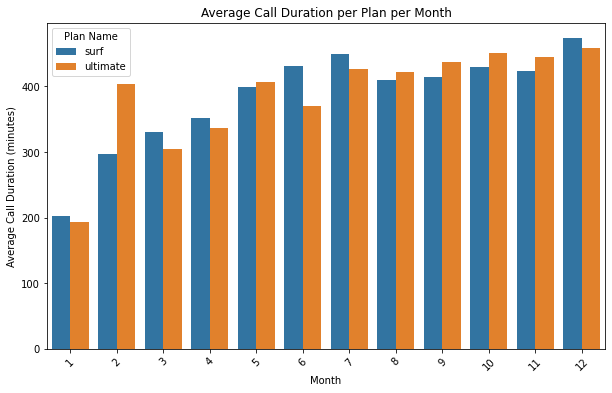

In [27]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

#finding the average duration of calls across both plans per month
avg_calls_dur = merged_data.groupby(['plan_name', 'month'])['rounded_min'].mean().reset_index()
print(avg_calls_dur.head())

#creating a bar plot for visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_calls_dur, x='month', y='rounded_min', hue='plan_name')
plt.title('Average Call Duration per Plan per Month')
plt.xlabel('Month')
plt.ylabel('Average Call Duration (minutes)')
plt.xticks(rotation=45)
plt.legend(title='Plan Name')
plt.show()

This bar plot shows that the average call duration across each plan is relativley similar except for month 2, where ultimate has siginificantly more minutes in that month. Surf has slightly more minutes than Ultimate for 7 out of the 12 months.

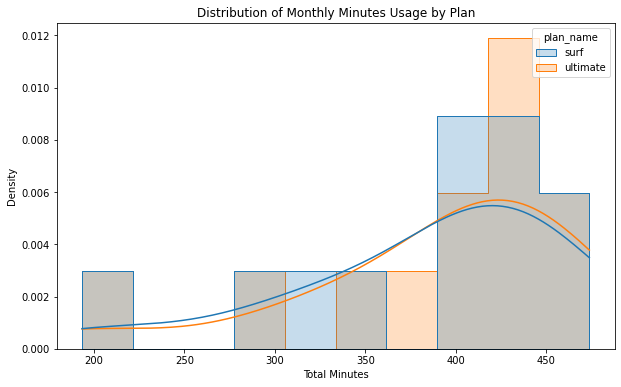

In [28]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
plt.figure(figsize=(10, 6))
sns.histplot(data=avg_calls_dur, x='rounded_min',bins=10, hue='plan_name', element='step', stat='density', common_norm=False, kde=True)
plt.title('Distribution of Monthly Minutes Usage by Plan')
plt.xlabel('Total Minutes')
plt.ylabel('Density')
plt.show()

This histogram shows that the number of minutes users of each plan require are similar. It seems that ultimate users are more likely to go over 450 min compared to surf users.

The next step is to calculate the mean and variance and standard deviation of the monthly call duration to see if different plan users behave differently when it comes to call duration.

In [29]:
# Calculate the mean, variance, and stanard deviation of the monthly call duration
mean_call_dur = merged_data.groupby('plan_name')['rounded_min'].mean()
print("Mean Call Duration by Plan:")
print(mean_call_dur)

var_call_dur = merged_data.groupby('plan_name')['rounded_min'].var()
print("\nVariance of Call Duration by Plan:")
print(var_call_dur)

std_call_dur = var_call_dur ** 0.5
print("\nStandard Deviation of Call Duration by Plan:")
print(var_call_dur)

Mean Call Duration by Plan:
plan_name
surf        428.749523
ultimate    430.450000
Name: rounded_min, dtype: float64

Variance of Call Duration by Plan:
plan_name
surf        54968.279461
ultimate    57844.464812
Name: rounded_min, dtype: float64

Standard Deviation of Call Duration by Plan:
plan_name
surf        54968.279461
ultimate    57844.464812
Name: rounded_min, dtype: float64


Both plans have similar values for the mean, variance, and standard deviation, implying that calling behaviors of the two plans are similar.

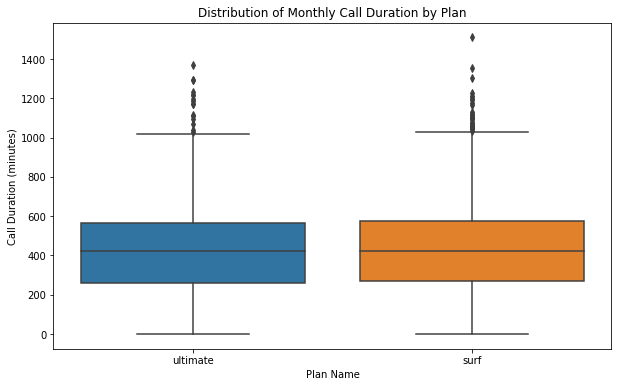

In [30]:
# Plot a boxplot to visualize the distribution of the monthly call duration
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='plan_name', y='rounded_min')
plt.title('Distribution of Monthly Call Duration by Plan')
plt.xlabel('Plan Name')
plt.ylabel('Call Duration (minutes)')
plt.show()

In terms of calling, the behaviors are nearly the same and it seems that the users of each plan have relatively the same call behaviors.

### Messages

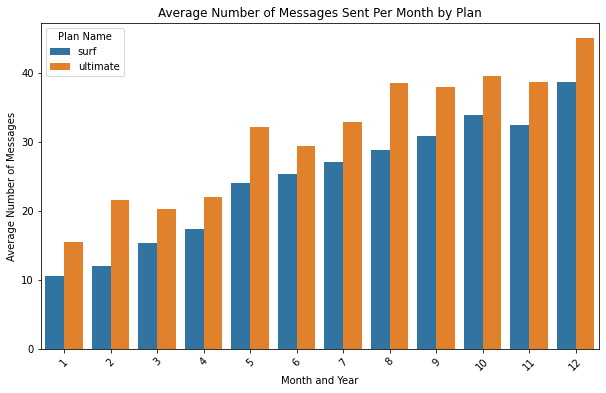

In [31]:
# Compare the number of messages users of each plan tend to send each month
#finding the average number of messages sent across both plans per month
num_of_messages = merged_data.groupby(['plan_name', 'month'])['num_messages'].mean().reset_index()

#creating a bar plot for visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=num_of_messages, x='month', y='num_messages', hue='plan_name')
plt.title('Average Number of Messages Sent Per Month by Plan')
plt.xlabel('Month and Year')
plt.ylabel('Average Number of Messages')
plt.xticks(rotation=45)
plt.legend(title='Plan Name')
plt.show()

Ultimate users on average send more messages than surf users. This can be attributed to the fact that texting is generally more common than phone calls and ultimate has a higher allowance of messages per month than surf.

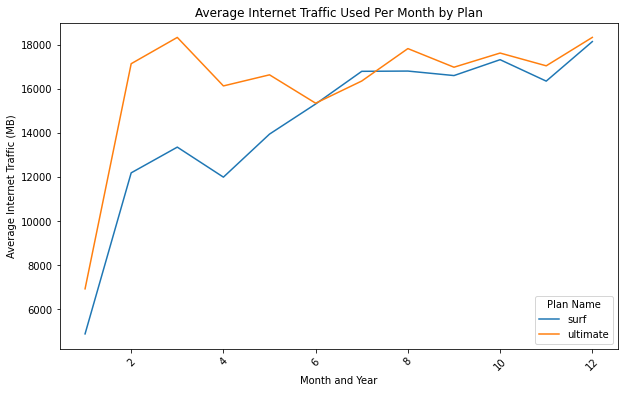

In [32]:
# Compare the amount of internet traffic consumed by users per plan
#finding the average internet traffic across both plans per month
internet_traffic = merged_data.groupby(['plan_name', 'month'])['mb_used'].mean().reset_index()

#creating a lineplot for visualization
plt.figure(figsize=(10, 6))
sns.lineplot(data=internet_traffic, x='month', y='mb_used', hue='plan_name')
plt.title('Average Internet Traffic Used Per Month by Plan')
plt.xlabel('Month and Year')
plt.ylabel('Average Internet Traffic (MB)')
plt.xticks(rotation=45)
plt.legend(title='Plan Name')
plt.show()


On average, ultimate users tend to use more Mb for internet traffic than surf users. This can be attributed to the fact that ultimate has a higher allowance for internet traffic than surf.

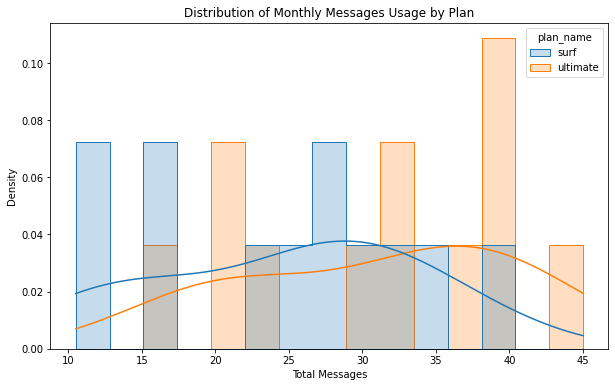

In [33]:
# Compare the number of messages users of each plan require each month. Plot a histogram.
plt.figure(figsize=(10, 6))
sns.histplot(data=num_of_messages, x='num_messages', bins = 15, hue='plan_name', element='step', stat='density', common_norm=False, kde=True)
plt.title('Distribution of Monthly Messages Usage by Plan')
plt.xlabel('Total Messages')
plt.ylabel('Density')
plt.show()

This figure also shows that ultimate users tend to use more messages than surf users.

In [34]:
# Calculate the mean, variance and standard deviation of the monthly number of messages
mean_num_messages = merged_data.groupby('plan_name')['num_messages'].mean()
print("Mean Number of Messages by Plan:")
print(mean_num_messages)

var_num_messages = merged_data.groupby('plan_name')['num_messages'].var()
print("\nVariance of Number of Messages by Plan:")
print(var_num_messages)

std_num_messages = var_num_messages ** 0.5
print("\nStandard Deviation of Number of Messages by Plan:")
print(std_num_messages)

Mean Number of Messages by Plan:
plan_name
surf        31.159568
ultimate    37.551389
Name: num_messages, dtype: float64

Variance of Number of Messages by Plan:
plan_name
surf        1126.724522
ultimate    1208.756744
Name: num_messages, dtype: float64

Standard Deviation of Number of Messages by Plan:
plan_name
surf        33.566717
ultimate    34.767179
Name: num_messages, dtype: float64


The mean, variance, and standard deviation show that users of the ultimate tend to use slightly more messages than surf users.

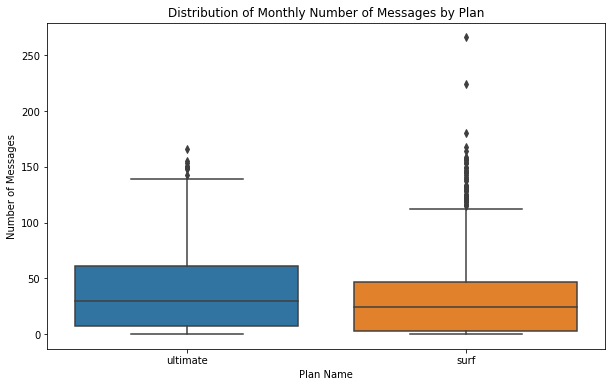

In [35]:
# Plot a boxplot to visualize the distribution of the monthly number of messages
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='plan_name', y='num_messages')
plt.title('Distribution of Monthly Number of Messages by Plan')
plt.xlabel('Plan Name')
plt.ylabel('Number of Messages')
plt.show()

I determine that users of the ultimate plan are more likely to send more messages than users of the surf plan. This behavior is probably due to the fact that ultimate users are allowed more messages with no extra charge than surf users.

### Internet

  plan_name  month       mb_used
0      surf      1   4874.860000
1      surf      2  12178.843333
2      surf      3  13345.440000
3      surf      4  11984.203000
4      surf      5  13936.354935


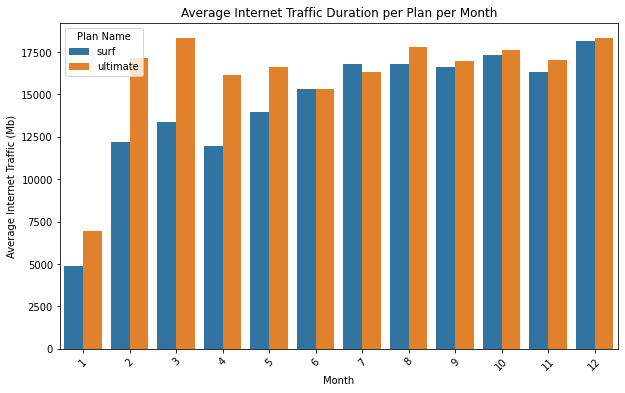

In [36]:
# Compare average duration of internet traffic per each plan per each distinct month. Plot a bar plat to visualize it.
avg_internet_dur = merged_data.groupby(['plan_name', 'month'])['mb_used'].mean().reset_index()
print(avg_internet_dur.head())

#creating a bar plot for visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_internet_dur, x='month', y='mb_used', hue='plan_name')
plt.title('Average Internet Traffic Duration per Plan per Month')
plt.xlabel('Month')
plt.ylabel('Average Internet Traffic (Mb)')
plt.xticks(rotation=45)
plt.legend(title='Plan Name')
plt.show()

Ultimate users tend to use more internet traffic than surf users. The average internet traffic for ultimate is slightly higher or significantly higher than for surf.

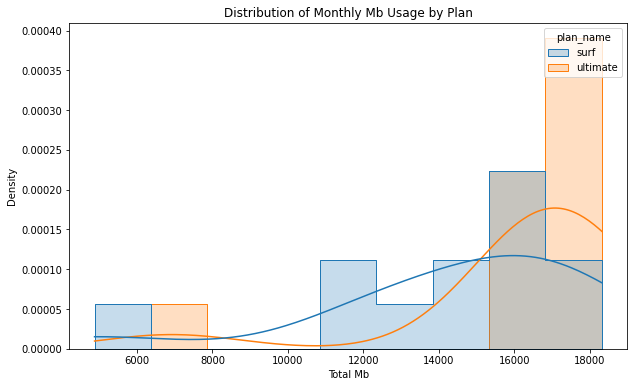

In [37]:
# Compare the number of mb users of each plan require each month. Plot a histogram.
plt.figure(figsize=(10, 6))
sns.histplot(data=avg_internet_dur, x='mb_used', hue='plan_name', element='step', stat='density', common_norm=False, kde=True)
plt.title('Distribution of Monthly Mb Usage by Plan')
plt.xlabel('Total Mb')
plt.ylabel('Density')
plt.show()

Ultimate users tend to use more Mb than surf users.

In [38]:
# Calculate the mean, variance, and standard deviation of the monthly internet traffic
mean_internet_use = merged_data.groupby('plan_name')['mb_used'].mean()
print("Mean Mb Used by Plan:")
print(mean_internet_use)

var_internet_use = merged_data.groupby('plan_name')['mb_used'].var()
print("\nVariance of Internet Usage by Plan:")
print(var_internet_use)

std_internet_use = var_internet_use ** 0.5
print('\nStandard Deviation of Internet Usage by Plan:')
print(std_internet_use)

Mean Mb Used by Plan:
plan_name
surf        16558.283490
ultimate    17214.699694
Name: mb_used, dtype: float64

Variance of Internet Usage by Plan:
plan_name
surf        6.421640e+07
ultimate    6.165229e+07
Name: mb_used, dtype: float64

Standard Deviation of Internet Usage by Plan:
plan_name
surf        8013.513327
ultimate    7851.897435
Name: mb_used, dtype: float64


From looking at the mean, variance and standard deviation, it can be determined that ultiamte users use slightly more Mb than surf users.

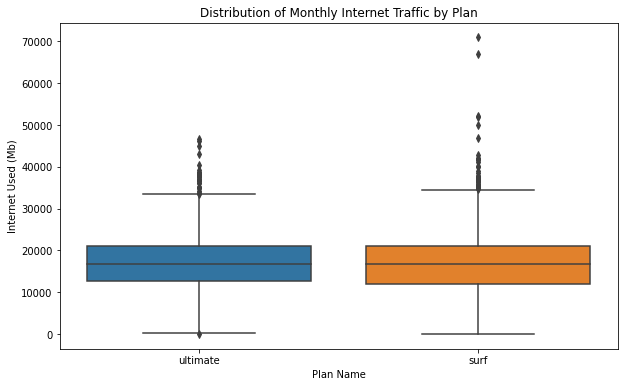

In [39]:
# Plot a boxplot to visualize the distribution of the monthly internet traffic
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='plan_name', y='mb_used')
plt.title('Distribution of Monthly Internet Traffic by Plan')
plt.xlabel('Plan Name')
plt.ylabel('Internet Used (Mb)')
plt.show()

Since the internet consumption between plans is nearly identical, it can be determined that there is no significant internet behavior among different plan users.

## Revenue

  plan_name  month  monthly_revenue
0      surf      1        20.000000
1      surf      2        34.396667
2      surf      3        45.941304
3      surf      4        40.710600
4      surf      5        47.628182


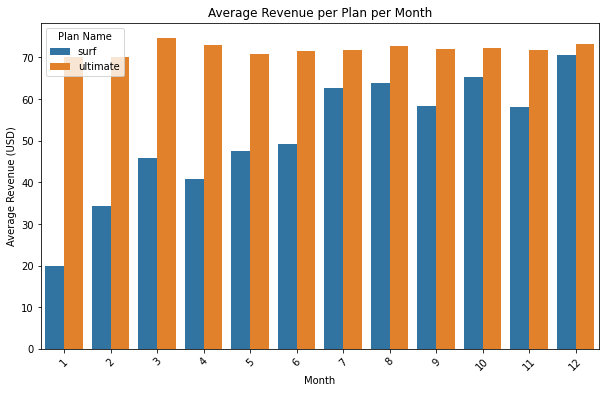

In [40]:
# Compare average revenue per each plan per each distinct month. Plot a bar plat to visualize it.
avg_revenue = merged_data.groupby(['plan_name', 'month'])['monthly_revenue'].mean().reset_index()
print(avg_revenue.head())

#creating a bar plot for visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_revenue, x='month', y='monthly_revenue', hue='plan_name')
plt.title('Average Revenue per Plan per Month')
plt.xlabel('Month')
plt.ylabel('Average Revenue (USD)')
plt.xticks(rotation=45)
plt.legend(title='Plan Name')
plt.show()

It seems on average that the Ultimate plan makes significantly more monthly revenue than the Surf plan.

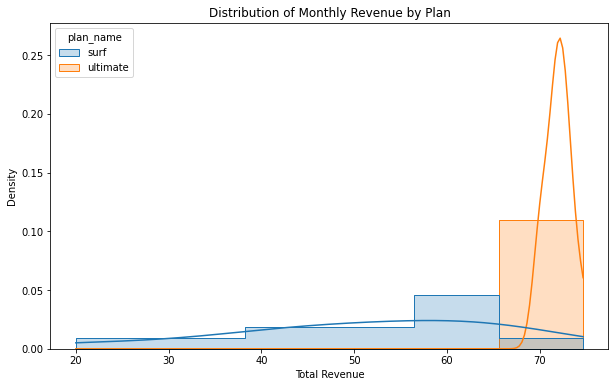

In [41]:
# Compare the monthly revenue users of each plan pay each month. Plot a histogram.
plt.figure(figsize=(10, 6))
sns.histplot(data=avg_revenue, x='monthly_revenue', hue='plan_name', element='step', stat='density', common_norm=False, kde=True)
plt.title('Distribution of Monthly Revenue by Plan')
plt.xlabel('Total Revenue')
plt.ylabel('Density')
plt.show()

In [42]:
# Calculate the mean, variance and standard deviation of the monthly revenue
mean_revenue = merged_data.groupby('plan_name')['monthly_revenue'].mean()
print("Mean Monthly Revenue by Plan:")
print(mean_revenue)

var_revenue = merged_data.groupby('plan_name')['monthly_revenue'].var()
print("\nVariance of Monthly Revenue by Plan:")
print(var_revenue)

std_revenue = var_revenue ** 0.05
print("\nStandard Deviation of Monthly Revenue by Plan:")
print(std_revenue)

Mean Monthly Revenue by Plan:
plan_name
surf        60.706408
ultimate    72.313889
Name: monthly_revenue, dtype: float64

Variance of Monthly Revenue by Plan:
plan_name
surf        3067.835152
ultimate     129.848486
Name: monthly_revenue, dtype: float64

Standard Deviation of Monthly Revenue by Plan:
plan_name
surf        1.493969
ultimate    1.275475
Name: monthly_revenue, dtype: float64


By looking at the mean, variance, and standard deviation, it is clear that the Ultimate plan makes signigicantly more revenue than the Surf plan. The lower variance of the Ultimate plan means that the monthly revenue numbers are more consistent and will be easier to make predictions.

## Test statistical hypotheses

Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs

Null hypothesis: The average revenue from users of the Ultimate and Surf calling plans are equal
Alternative hypothesis: The average revenue from users of the Ultimate and Surf calling plans are not equal

In [43]:
# Test the hypotheses
sample_1 = merged_data[merged_data['plan_name'] == 'surf']['monthly_revenue'] #getting surf plan revenue
sample_2 = merged_data[merged_data['plan_name'] == 'ultimate']['monthly_revenue'] #getting ultimate plan revenue

p_value = st.ttest_ind(sample_1, sample_2).pvalue
alpha = 0.05 #using the conventional alpha value 

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the plans.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the plans.")

Reject the null hypothesis: There is a significant difference between the plans.


By running a two-tailed hypothesis, there is sufficient evidence to reject the null hypothesis, meaning the revenue difference between the plans are not equal. This result is supported by the analysis of the monthly revenue in the step prior which also shows that the Ultimate plan makes more revenue than the Surf plan. Here I used a two tailed hypothesis test since it is comparing the mean of two populations where one group could be higher or lower than the other.

Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions

Null Hypothesis: There is no difference in average revenue between users in the NY-NJ area and users from other regions.
Alternative Hypothesis: There is a difference in average revenue between users in the NY-NJ area and users from other regions.

In [44]:
# Test the hypotheses
#Adding city information to the merged data
merged_data = pd.merge(merged_data, users_df[['user_id', 'city']], on = 'user_id', how = 'left')
merged_data

,user_id,month,num_calls,rounded_min,num_messages,mb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,extra_calls,extra_texts,extra_data,monthly_revenue,city
0,1000,12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,0.00,0.0,70.00,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,0.0,0.00,0.0,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,0.0,0.00,0.0,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,0.0,0.09,70.0,90.09,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,0.0,0.00,40.0,60.00,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,surf,50,15360,500,20,10,0.03,0.03,0.0,0.33,0.0,20.33,"Boston-Cambridge-Newton, MA-NH MSA"
2289,1361,5,0.0,0.0,2.0,1519.69,surf,50,15360,500,20,10,0.03,0.03,0.0,0.00,0.0,20.00,"Birmingham-Hoover, AL MSA"
2290,1482,10,0.0,0.0,2.0,0.00,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,0.00,0.0,70.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2291,1108,12,0.0,0.0,0.0,233.17,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,0.00,0.0,70.00,"Salt Lake City, UT MSA"


In [45]:
sample_ny1 = merged_data[merged_data['city'].str.contains('NY-NJ')]['monthly_revenue'] #getting revenue for users in NY-NJ region
sample_ny2 = merged_data[~merged_data['city'].str.contains('NY-NJ')]['monthly_revenue'] #getting revenue for users not in NY-NJ region
print(len(sample_ny1))
print(len(sample_ny2))
p_value = st.ttest_ind(sample_ny1, sample_ny2, equal_var=False).pvalue
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average revenue between the groups.")
else:
    print("Fail to reject the null hypothesis: There is not a significant difference in average revenue between the groups.")

377
1916
Reject the null hypothesis: There is a significant difference in average revenue between the groups.


By running a two-tailed hypothesis, there is sufficient evidence to reject the null hypothesis, meaning the revenue between the customers in the NY-NJ region are not equal to the revenue from customers in all other regions. This result is supported by the fact that there are significantly more customers not in the NY-NJ area that more revenue can be collected from. Here I used a two tailed hypothesis test since it is comparing the mean of two populations where one group could be higher or lower than the other.

## General conclusion
Ultimately, the Ultimate plan brings in more revenue than the Surf plan. In regards to customer behaviors, customers of both plans tend to use their calls, texts, and internet in a similar manner. Ultimate users have slightly more calls, texts, and internet mainly due to the fact their base plan allows for more allowance than surf users. The biggest difference between the two plans is the revenue. Since users generally have the same behaviors and Ultimate charges more for the monthly fee, the monthly charge for surf and the extra charges for surf do not make more revenue than the Ultimate plan. In regards to customers in a particular region such as NY-NJ, more revenue is brought in in areas with more customers regardless of the plan they use. In conclusion, the advertising team should allocate more budget to advertising the Ultimate plan.